# UFC Social Network Analysis

## Inspiration

While watching a UFC game, I realized a lot of people don't care for the general fights, i.e. people who watch don't usually start to pay attention until the start of the two to three fights before the headliner. These fights are generally important since they are 'fight for title' fights, up towards the main headliner fight, so it makes sense. We have also seen instances where some fighters will go up a weight class, or down a weight class just to fight someone else for the title. 

These instances make me curious as to whether there is a clear network of fights (everyone can be connected), or are there are multiple network of fighters?

In this analysis of UFC fighter data, I will only create a network or networks after the acquisition of Dana White.

In [1]:
import pandas as pd

In [2]:
# Reading CSV
ufc_df = pd.read_csv("ALL UFC FIGHTS 2_23_2016 SHERDOG.COM - Sheet1.csv")

In [3]:
ufc_df.head()

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
0,/events/UFC-1-The-Beginning-7,7,8,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Gerard-Gordeau-15,Royce Gracie,Gerard Gordeau,win,loss,19,15,Submission,Rear-Naked Choke,Helio Vigio,1,1:44
1,/events/UFC-1-The-Beginning-7,7,7,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Jason-DeLucia-22,/fighter/Trent-Jenkins-23,Jason DeLucia,Trent Jenkins,win,loss,22,23,Submission,Rear-Naked Choke,Joao Alberto Barreto,1,0:52
2,/events/UFC-1-The-Beginning-7,7,6,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Royce-Gracie-19,/fighter/Ken-Shamrock-4,Royce Gracie,Ken Shamrock,win,loss,19,4,Submission,Rear-Naked Choke,Helio Vigio,1,0:57
3,/events/UFC-1-The-Beginning-7,7,5,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Gerard-Gordeau-15,/fighter/Kevin-Rosier-17,Gerard Gordeau,Kevin Rosier,win,loss,15,17,TKO,Corner Stoppage,Joao Alberto Barreto,1,0:59
4,/events/UFC-1-The-Beginning-7,7,4,UFC 1 - The Beginning,Ultimate Fighting Championship,11/12/1993,"McNichols Arena, Denver, Colorado, United States",/fighter/Ken-Shamrock-4,/fighter/Patrick-Smith-21,Ken Shamrock,Patrick Smith,win,loss,4,21,Submission,Heel Hook,Helio Vigio,1,1:49


In [4]:
#Turning date to datetime to segment data past 2001; the year Dana White bought UFC
ufc_df['event_date'] = pd.to_datetime(ufc_df['event_date'])

In [5]:
#Dana White purchased UFC January 2001
ac_date = ufc_df['event_date'] > '01-01-2001'

In [6]:
#Segmenting data based on acquisition date
ufc_df = ufc_df.loc[ac_date]
ufc_df.head()

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
252,/events/UFC-30-Battle-on-the-Boardwalk-40,40,8,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Tito-Ortiz-158,/fighter/Evan-Tanner-212,Tito Ortiz,Evan Tanner,win,loss,158,212,KO,Slam,John McCarthy,1,0:32
253,/events/UFC-30-Battle-on-the-Boardwalk-40,40,7,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Jens-Pulver-228,/fighter/Caol-Uno-283,Jens Pulver,Caol Uno,win,loss,228,283,Decision,Unanimous,John McCarthy,5,5:00
254,/events/UFC-30-Battle-on-the-Boardwalk-40,40,6,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Fabiano-Iha-218,/fighter/Phil-Johns-282,Fabiano Iha,Phil Johns,win,loss,218,282,Submission,Armbar,John McCarthy,1,2:05
255,/events/UFC-30-Battle-on-the-Boardwalk-40,40,5,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Elvis-Sinosic-281,/fighter/Jeremy-Horn-202,Elvis Sinosic,Jeremy Horn,win,loss,281,202,Submission,Triangle Armbar,John McCarthy,1,2:59
256,/events/UFC-30-Battle-on-the-Boardwalk-40,40,4,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Pedro-Rizzo-208,/fighter/Josh-Barnett-272,Pedro Rizzo,Josh Barnett,win,loss,208,272,KO,Punch,John McCarthy,2,4:21


In [7]:
""" 
Thankfully our data has the feature 'mid' which gives us the fight number, e.g. 8 gives us the last fight.
This means we can segment data out based on the last 3 fights by removing max number in a step down way
"""

#Take max mid number from each event
idx1 = ufc_df.groupby(['event_name'])['mid'].transform(max) == ufc_df['mid']

#Segment data based on max number
seg1 = ufc_df[idx1]

#Create a new df without max number
seg_step1 = ufc_df[~idx1]

In [8]:
idx2 = seg_step1.groupby(['event_name'])['mid'].transform(max) == seg_step1['mid']

seg2 = seg_step1[idx2]

seg_step2 = seg_step1[~idx2]

In [9]:
idx3 = seg_step2.groupby(['event_name'])['mid'].transform(max) == seg_step2['mid']

seg3 = seg_step2[idx3]

In [10]:
#Concatenating segmented data to a new df
df = pd.concat([seg1,seg2,seg3])

In [11]:
df.head()

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
252,/events/UFC-30-Battle-on-the-Boardwalk-40,40,8,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Tito-Ortiz-158,/fighter/Evan-Tanner-212,Tito Ortiz,Evan Tanner,win,loss,158,212,KO,Slam,John McCarthy,1,0:32
260,/events/UFC-31-Locked-Loaded-282,282,8,UFC 31 - Locked & Loaded,Ultimate Fighting Championship,2001-05-04,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Randy-Couture-166,/fighter/Pedro-Rizzo-208,Randy Couture,Pedro Rizzo,win,loss,166,208,Decision,Unanimous,NaN,5,5:00
268,/events/UFC-32-Showdown-in-the-Meadowlands-429,429,8,UFC 32 - Showdown in the Meadowlands,Ultimate Fighting Championship,2001-06-29,"Continental Airlines Arena, East Ruthorford, N...",/fighter/Tito-Ortiz-158,/fighter/Elvis-Sinosic-281,Tito Ortiz,Elvis Sinosic,win,loss,158,281,TKO,Punches and Elbows,NaN,1,3:32
276,/events/UFC-33-Victory-in-Vegas-430,430,8,UFC 33 - Victory in Vegas,Ultimate Fighting Championship,2001-09-28,"Mandalay Bay Events Center, Las Vegas, Nevada,...",/fighter/Tito-Ortiz-158,/fighter/Vladimir-Matyushenko-435,Tito Ortiz,Vladimir Matyushenko,win,loss,158,435,Decision,Unanimous,NaN,5,5:00
284,/events/UFC-34-High-Voltage-540,540,8,UFC 34 - High Voltage,Ultimate Fighting Championship,2001-11-02,"MGM Grand Garden Arena, Las Vegas, Nevada, Uni...",/fighter/Randy-Couture-166,/fighter/Pedro-Rizzo-208,Randy Couture,Pedro Rizzo,win,loss,166,208,TKO,Punches,NaN,3,1:38


In [12]:
#Dropping columns we don't need
to_drop = ['pageurl','event_org','event_date','event_place','f1pageurl','f2pageurl','f1fid','f2fid','ref',]
df = df.drop(columns = to_drop)
df = df.sort_values(by = 'eid', ascending = True)

In [13]:
df.head()

,eid,mid,event_name,f1name,f2name,f1result,f2result,method,method_d,round,time
252,40,8,UFC 30 - Battle on the Boardwalk,Tito Ortiz,Evan Tanner,win,loss,KO,Slam,1,0:32
253,40,7,UFC 30 - Battle on the Boardwalk,Jens Pulver,Caol Uno,win,loss,Decision,Unanimous,5,5:00
254,40,6,UFC 30 - Battle on the Boardwalk,Fabiano Iha,Phil Johns,win,loss,Submission,Armbar,1,2:05
260,282,8,UFC 31 - Locked & Loaded,Randy Couture,Pedro Rizzo,win,loss,Decision,Unanimous,5,5:00
261,282,7,UFC 31 - Locked & Loaded,Carlos Newton,Pat Miletich,win,loss,Submission,Bulldog Choke,3,2:50


In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
Names = df[['f1name','f2name','method']]

G = nx.from_pandas_edgelist(Names,'f1name','f2name')

In [39]:
print('# of edges: {}'.format(G.number_of_edges()))
print('# of nodes: {}'.format(G.number_of_nodes()))

# of edges: 890
# of nodes: 542


In [40]:
#Setting colors as index number
nodes1 = G.nodes(data = True)
charac = pd.DataFrame(nodes1)
charac = charac.drop(columns = [1])
charac['num'] = charac.index

charac = charac.set_index(0)
charac = charac.reindex(G.nodes())

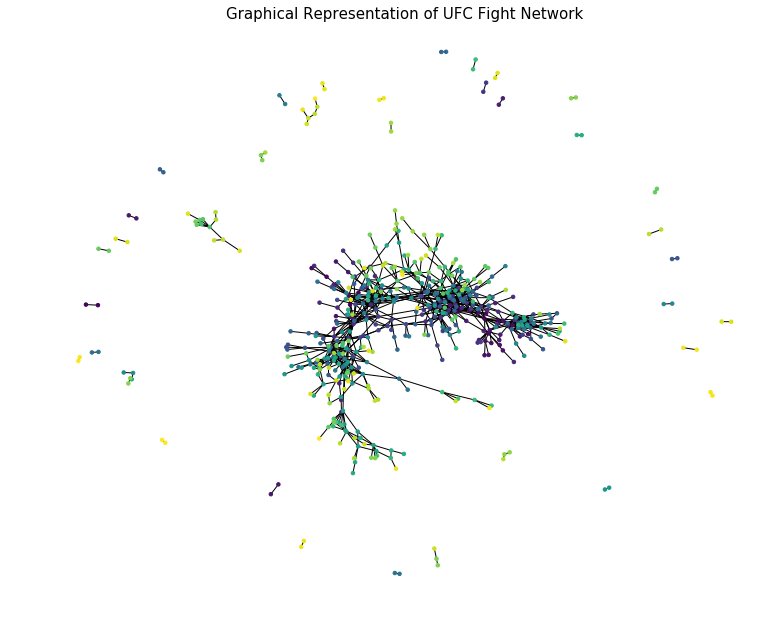

In [45]:
#Plotting network
plt.figure(figsize=(10,8))
nx.draw(G, node_size=12, node_color=charac['num'])
plt.title('Graphical Representation of UFC Fight Network', size=15)
plt.show()

In [42]:
#Isolating the large network in the center
lrg_comp = max(nx.connected_components(G), key = len)
G1 = G.subgraph(lrg_comp)

In [47]:
#Setting colors based on index number
nodes2 = G1.nodes(data = True)
charac2 = pd.DataFrame(nodes2)
charac2 = charac2.drop(columns = [1])
charac2['num'] = charac2.index

charac2 = charac2.set_index(0)
charac2 = charac2.reindex(G1.nodes())

In [29]:
#About 100 nodes were removed
print('# of edges: {}'.format(G1.number_of_edges()))
print('# of nodes: {}'.format(G1.number_of_nodes()))

# of edges: 832
# of nodes: 450


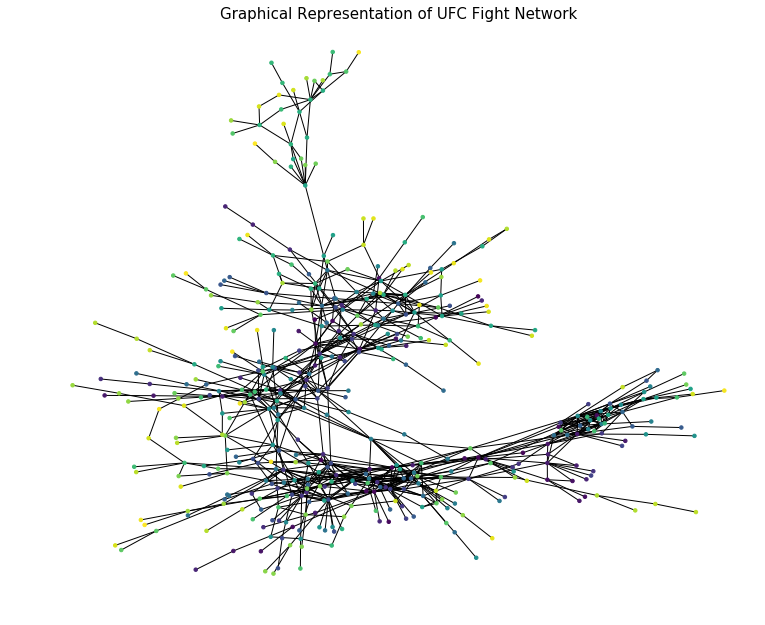

In [48]:
plt.figure(figsize=(10,8))
nx.draw(G1, node_size=12, node_color=charac2['num'])
plt.title('Graphical Representation of UFC Fight Network Central Network', size=15)
plt.show()

In [22]:
#Shrinking the network size to last 2 fights of each fight night
df2 = pd.concat([seg1,seg2]).sort_values(by = 'eid', ascending = True)

df2.head()

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
252,/events/UFC-30-Battle-on-the-Boardwalk-40,40,8,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Tito-Ortiz-158,/fighter/Evan-Tanner-212,Tito Ortiz,Evan Tanner,win,loss,158,212,KO,Slam,John McCarthy,1,0:32
253,/events/UFC-30-Battle-on-the-Boardwalk-40,40,7,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Jens-Pulver-228,/fighter/Caol-Uno-283,Jens Pulver,Caol Uno,win,loss,228,283,Decision,Unanimous,John McCarthy,5,5:00
261,/events/UFC-31-Locked-Loaded-282,282,7,UFC 31 - Locked & Loaded,Ultimate Fighting Championship,2001-05-04,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Carlos-Newton-7,/fighter/Pat-Miletich-188,Carlos Newton,Pat Miletich,win,loss,7,188,Submission,Bulldog Choke,NaN,3,2:50
260,/events/UFC-31-Locked-Loaded-282,282,8,UFC 31 - Locked & Loaded,Ultimate Fighting Championship,2001-05-04,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Randy-Couture-166,/fighter/Pedro-Rizzo-208,Randy Couture,Pedro Rizzo,win,loss,166,208,Decision,Unanimous,NaN,5,5:00
268,/events/UFC-32-Showdown-in-the-Meadowlands-429,429,8,UFC 32 - Showdown in the Meadowlands,Ultimate Fighting Championship,2001-06-29,"Continental Airlines Arena, East Ruthorford, N...",/fighter/Tito-Ortiz-158,/fighter/Elvis-Sinosic-281,Tito Ortiz,Elvis Sinosic,win,loss,158,281,TKO,Punches and Elbows,NaN,1,3:32


In [24]:
Names2 = df2[['f1name','f2name']]

G2 = nx.from_pandas_edgelist(Names2,'f1name','f2name')

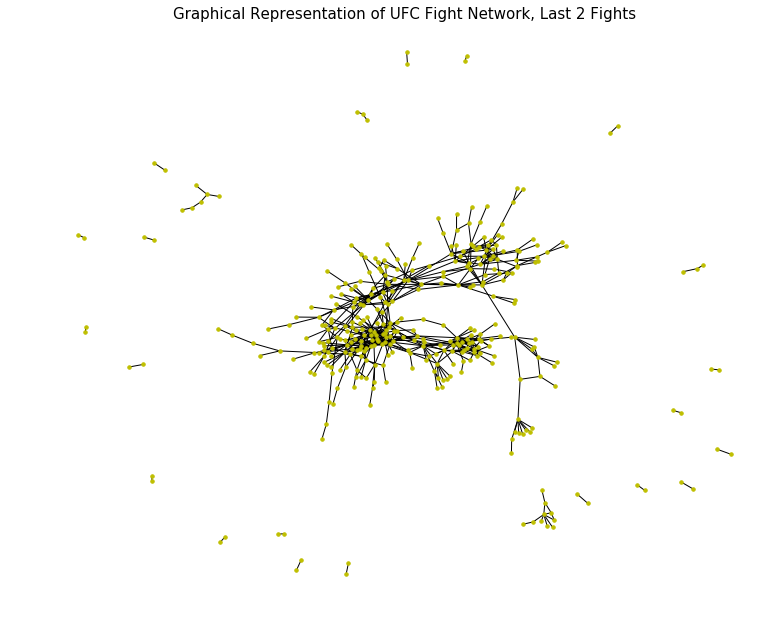

In [161]:
plt.figure(figsize=(10,8))
nx.draw(G2, node_size=12, node_color='y')
plt.title('Graphical Representation of UFC Fight Network, Last 2 Fights', size=15)
plt.show()

We see that by using the last 2 fights, it has trimmed down a bit, but we want to trim it even more!

In [52]:
#Last fight segment
df3 = seg1
df3.head()

,pageurl,eid,mid,event_name,event_org,event_date,event_place,f1pageurl,f2pageurl,f1name,f2name,f1result,f2result,f1fid,f2fid,method,method_d,ref,round,time
252,/events/UFC-30-Battle-on-the-Boardwalk-40,40,8,UFC 30 - Battle on the Boardwalk,Ultimate Fighting Championship,2001-02-23,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Tito-Ortiz-158,/fighter/Evan-Tanner-212,Tito Ortiz,Evan Tanner,win,loss,158,212,KO,Slam,John McCarthy,1,0:32
260,/events/UFC-31-Locked-Loaded-282,282,8,UFC 31 - Locked & Loaded,Ultimate Fighting Championship,2001-05-04,"Trump Taj Mahal, Atlantic City, New Jersey, Un...",/fighter/Randy-Couture-166,/fighter/Pedro-Rizzo-208,Randy Couture,Pedro Rizzo,win,loss,166,208,Decision,Unanimous,NaN,5,5:00
268,/events/UFC-32-Showdown-in-the-Meadowlands-429,429,8,UFC 32 - Showdown in the Meadowlands,Ultimate Fighting Championship,2001-06-29,"Continental Airlines Arena, East Ruthorford, N...",/fighter/Tito-Ortiz-158,/fighter/Elvis-Sinosic-281,Tito Ortiz,Elvis Sinosic,win,loss,158,281,TKO,Punches and Elbows,NaN,1,3:32
276,/events/UFC-33-Victory-in-Vegas-430,430,8,UFC 33 - Victory in Vegas,Ultimate Fighting Championship,2001-09-28,"Mandalay Bay Events Center, Las Vegas, Nevada,...",/fighter/Tito-Ortiz-158,/fighter/Vladimir-Matyushenko-435,Tito Ortiz,Vladimir Matyushenko,win,loss,158,435,Decision,Unanimous,NaN,5,5:00
284,/events/UFC-34-High-Voltage-540,540,8,UFC 34 - High Voltage,Ultimate Fighting Championship,2001-11-02,"MGM Grand Garden Arena, Las Vegas, Nevada, Uni...",/fighter/Randy-Couture-166,/fighter/Pedro-Rizzo-208,Randy Couture,Pedro Rizzo,win,loss,166,208,TKO,Punches,NaN,3,1:38


In [53]:
Names3 = df2[['f1name','f2name']]

G3 = nx.from_pandas_edgelist(Names3,'f1name','f2name')

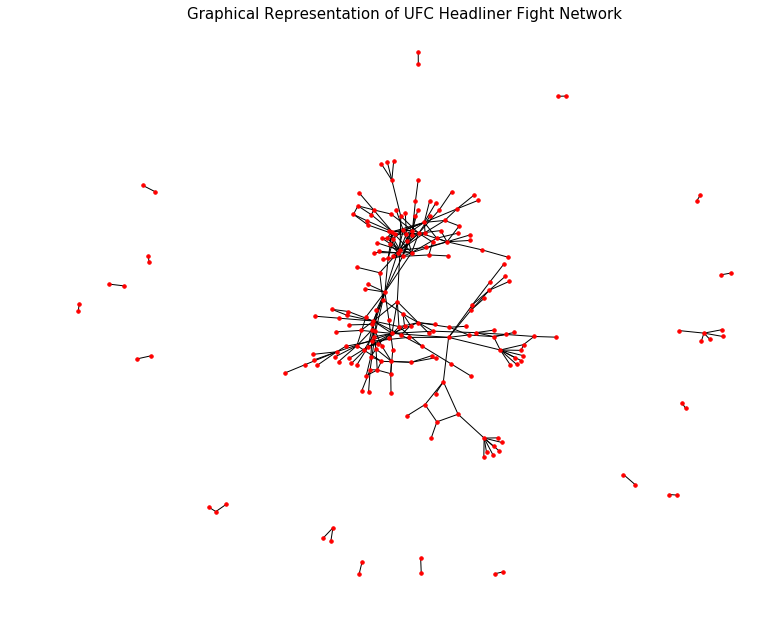

In [122]:
plt.figure(figsize=(10,8))
nx.draw(G3, node_size=12, node_color='r')
plt.title('Graphical Representation of UFC Headliner Fight Network', size=15)
plt.show()

Great! Now we see that the central nodes are sparse, so we can analyze the the central network easily!

In [55]:
lrg_comp_3 = max(nx.connected_components(G3), key = len)
G_3 = G3.subgraph(lrg_comp_3)

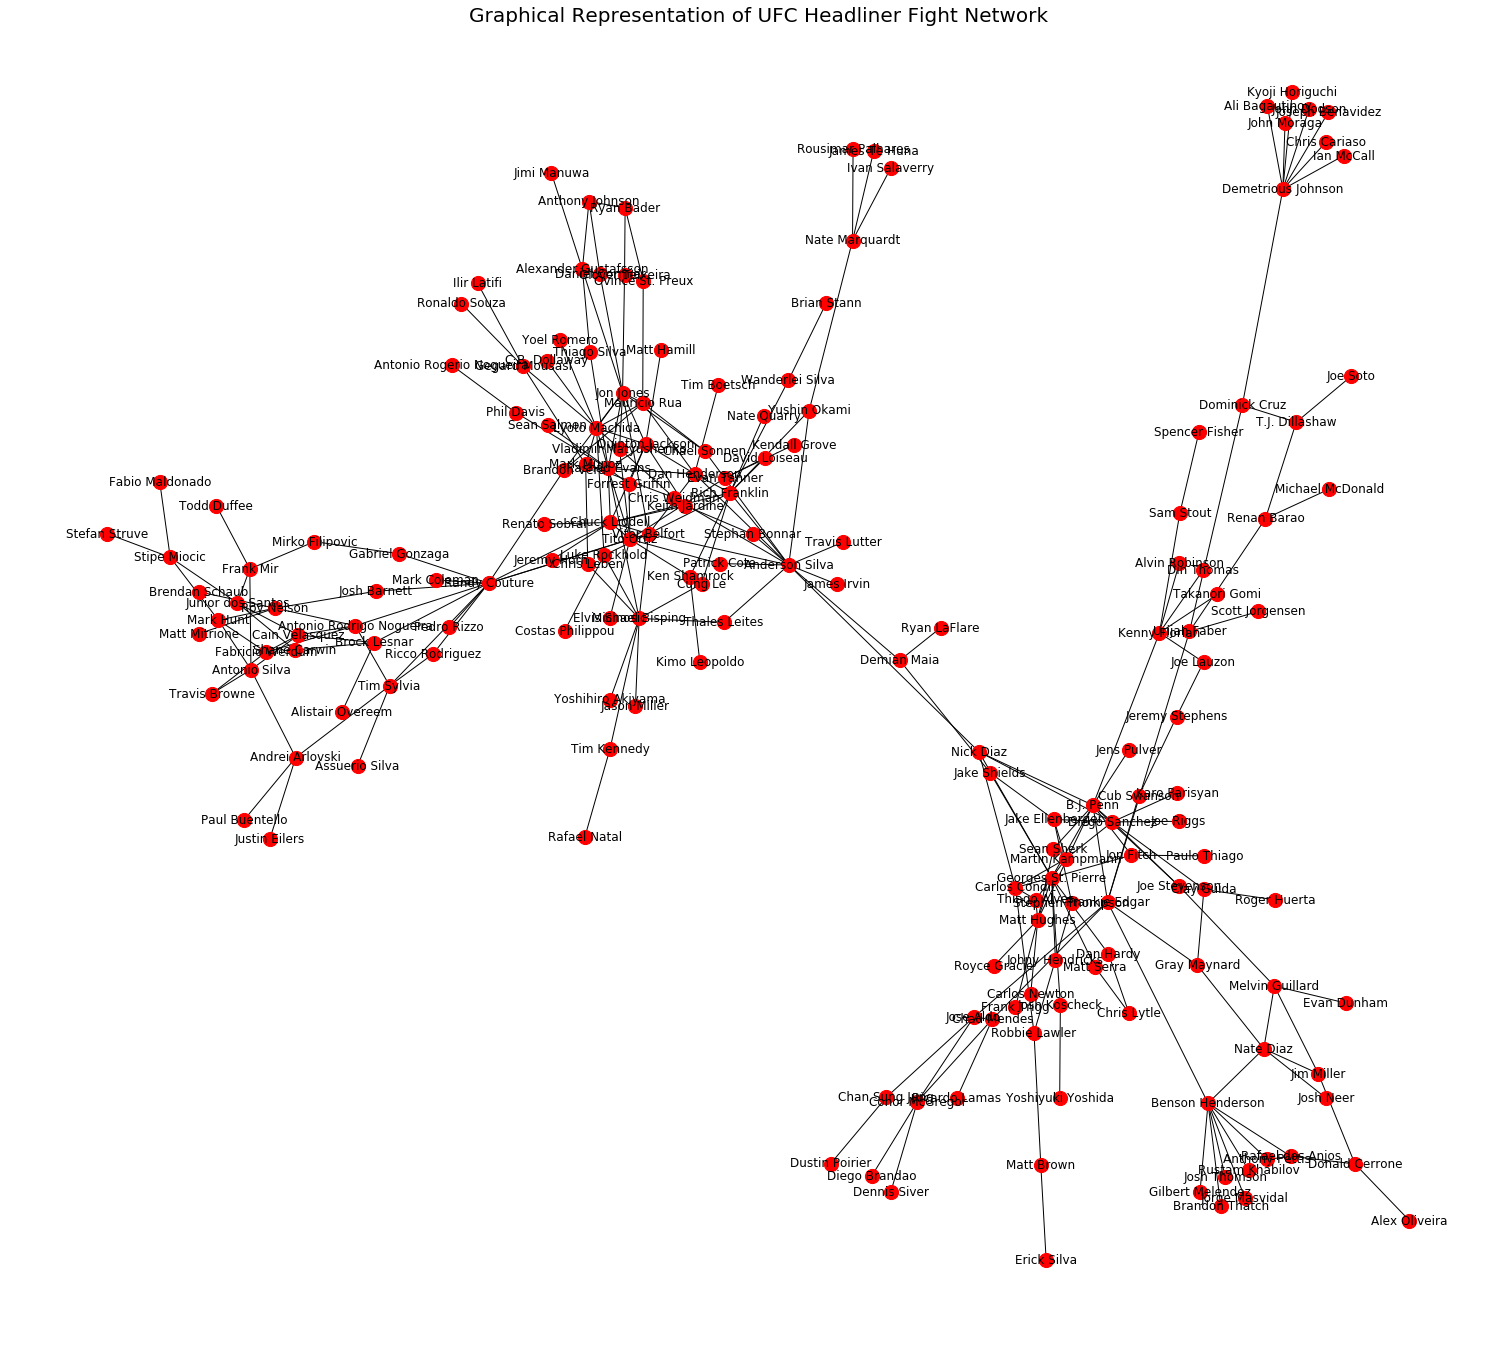

In [121]:
plt.figure(figsize=(20,18))
nx.draw(G_3, with_labels = True, node_size=200, node_color='r')
plt.title('Graphical Representation of UFC Headliner Fight Network', size=20)
plt.show()

In [127]:
#finding out which node / fighter has the most fights
sorted(G3.degree, key = lambda x: x[1], reverse = True)

[('Anderson Silva', 13),
 ('Randy Couture', 12),
 ('Rashad Evans', 11),
 ('Jon Jones', 11),
 ('Tito Ortiz', 10),
 ('B.J. Penn', 10),
 ('Rich Franklin', 10),
 ('Georges St. Pierre', 10),
 ('Lyoto Machida', 10),
 ('Chuck Liddell', 9),
 ('Vitor Belfort', 9),
 ('Michael Bisping', 9),
 ('Benson Henderson', 9),
 ('Diego Sanchez', 8),
 ('Quinton Jackson', 8),
 ('Demetrious Johnson', 8),
 ('Matt Hughes', 7),
 ('Dan Henderson', 7),
 ('Frankie Edgar', 7),
 ('Kenny Florian', 6),
 ('Mauricio Rua', 6),
 ('Tim Sylvia', 5),
 ('Nick Diaz', 5),
 ('Antonio Rodrigo Nogueira', 5),
 ('Nate Diaz', 5),
 ('Carlos Condit', 5),
 ('Roy Nelson', 5),
 ('Cain Velasquez', 5),
 ('Alexander Gustafsson', 5),
 ('Antonio Silva', 5),
 ('Ronda Rousey', 5),
 ('Andrei Arlovski', 4),
 ('Nate Marquardt', 4),
 ('Melvin Guillard', 4),
 ('Brock Lesnar', 4),
 ('Martin Kampmann', 4),
 ('Frank Mir', 4),
 ('Junior dos Santos', 4),
 ('Urijah Faber', 4),
 ('Jake Ellenberger', 4),
 ('Mark Munoz', 4),
 ('Jose Aldo', 4),
 ('Chad Mendes', 

In [128]:
max(dict(G3.degree()).items(), key = lambda x:x[1])

('Anderson Silva', 13)

Now we want to see Anderson Silva's fight network for headlining fights

In [143]:
AS_G = [n[1] for n in G3.edges('Anderson Silva')]
AS_G.append('Anderson Silva')

In [145]:
sub_G = nx.Graph(G3.subgraph(AS_G))

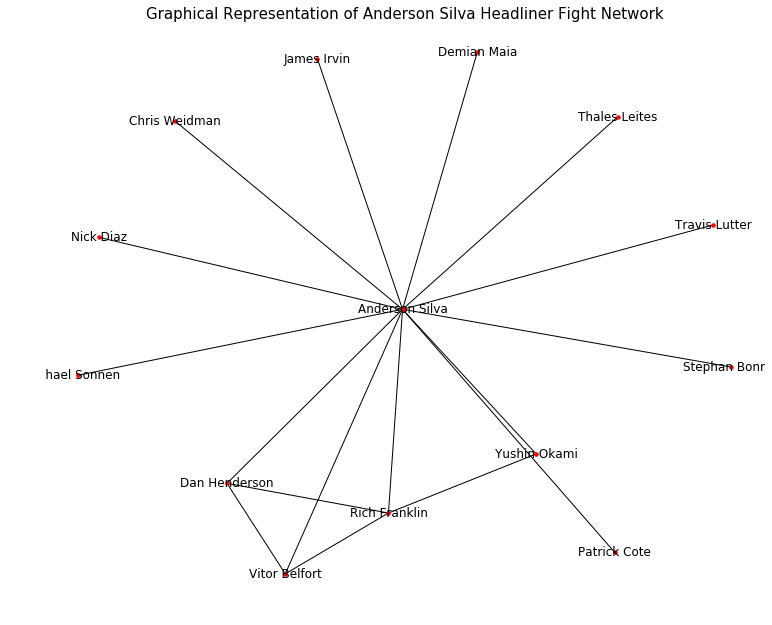

In [148]:
plt.figure(figsize=(10,8))
nx.draw(sub_G, with_labels = True, node_size=12, node_color='r')
plt.title('Graphical Representation of Anderson Silva Headliner Fight Network', size=15)
plt.show()

As we have seen by removing the number of fights in our network, there is a central network of fighters who consistently fight each other and are headliners / title fights. There are multiple disjointed fights that do note connect with the max central network. This is pretty interesting since there seems to be some fighters who change weightclasses to fight other fighters which extends the hypothesis that there is a central network of headliner fights.